![](https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png)

# Sea, Sun, and Python

## Table of content:

* [Preamble](#preamble)
* [Data](#data)
* [Analytical Methods](#analytical)
    * [Age Model and bentic-planktonic age offset](#agemodel)
    * [Sea surface temperature estimation](#sst)
    * [The MD98-2181 record](#record)
* [Statistical Methods](#statistics)
    * [Spectral Analysis](#spectral)
        * [Sea Surface Temperature](#spectralsurf)
            * [Effect of choice of pre-processing steps on the analysis results](#prespectral)
            * [Effect of choice of parameters on the analysis results](#paramspectral)
            * [Effect of choice of algorithm on the analysis results](#anaspectral)
        * [Benthic record](#spectralbenthic)
            * [Effect of choice of pre-processing steps on the analysis results](#premund)
            * [Effect of choice of algorithm on the analysis results](#anamund)
    * [Wavelet Analysis](#wavelet)
    * [Cross-Wavelet Analysis](#xwt)
* [Solar Variability](#solar)

## <a name='preamble'>Preamble</a>

This notebook reproduces the study by [Khider et al. (2014)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2013PA002534). The goal of the study is to understand the origin of millennial scale variability in the Western Pacific Warm Pool.

## <a name='data'>Data</a>

The original dataset (along with the ensembles from Khider et al. (2014) are available on the [LinkedEarth wiki](http://wiki.linked.earth/MD982181.Khider.2014) in the Linked Paleo Data Format ([LiPD](https://lipd.net)). The dataset consists of Mg/Ca and \\(\delta^{18}O\\) measurements on the planktonic foraminifer *Globigeriniodes ruber*, a measure of sea surface temperature (SST)and \\(\delta^{18}O_{sw}\\) and \\(\delta^{18}O\\) measurements on the benthic foraminifer *Cibicidoides mundulus*, a measure of bottom water temperature and salinity. The sediment core (MD98-2181) was retrieved from the Davao Gulf, south of Mindanao at a depth of 2114m.

Let's import this file into Pyleoclim and plot the location of the archive.

In [1]:
import pyleoclim as pyleo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pyleo.set_style('web')

In [2]:
D = pyleo.Lipd('./data/MD982181.Khider.2014.lpd')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: MD982181.Khider.2014.lpd
14.23 MB :That's a big file! This may take a while to load...
Finished read: 1 record


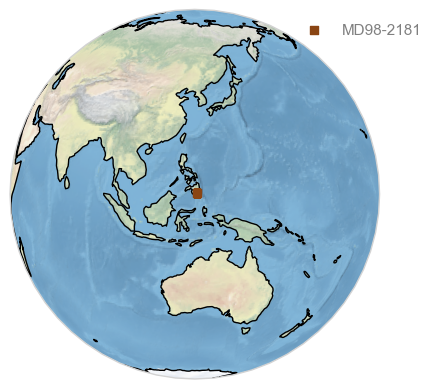

In [3]:
fig_map, ax = D.mapAllArchive(projection='Orthographic', proj_default={'central_longitude':125, 'central_latitude':6}, mute=True, )
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(current_handles,['MD98-2181'],bbox_to_anchor=(1.15, 1))
pyleo.showfig(fig_map)

## <a name='analytical'>Analytical methods</a>

### <a name='agemodel'>Age Model and bentic-planktonic age offset</a>

The age model for the core was obtained from 14 radiocarbon ages on mixed planktonics, adjusted with a reservoir age correction of 15$\pm$79 years. The resulting age distributions, which took into consideration uncertainty in the measurements, the [Marine09 curve](https://www.cambridge.org/core/journals/radiocarbon/article/intcal09-and-marine09-radiocarbon-age-calibration-curves-050000-years-cal-bp/FB3ABE7B3D43ED9C34F621CBC4975100), and the reservoir age correction, were used to contruct the age-depth relationship by fitting 10,000 smoothing splines (1000 were stored in the LiPD file). The benthic age model was offset by 1000$\pm$300 years to take into consideration travel time between the region of formation in the Southern Ocean and the site location in the tropical Pacific following [Stott et al, 2007](https://www.science.org/doi/10.1126/science.1143791).The resulting age models were stored in the LiPD file.

![Age model for MD98-2181](./figures/MD81_agemodel.png)
**Age model for MD98-2181:** (a) Planktonic age model. The filled circles represent the planktonic mean calibrated ages obtained from G. sacculifer, a mixture of G. sacculifer/G. ruber, and mixed planktonic species. The solid line represents the constructed age model using a smoothing cubic spline interpolation scheme, with the 95% confidence level from Monte-Carlo simulations represented by the dotted lines and the shaded area. (b) Benthic age model. The filled circles represent the benthic mean calibrated age obtained from adding 1000 ± 300 years to the planktonic age distributions. The solid line rep- resents the constructed age model using a smoothing cubic spline interpolation scheme, with the 95% confidence level from Monte-Carlo simulations represented by the dotted lines and the shaded area. Reproduced from [Khider et al. (2014)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2013PA002534). 

![Planktonic-Benthic](./figures/MD81_ageoffset.png)
**Planktonic-Benthic Offset** (a) Modern radiocarbon age (estimated from GLODAP Δ14C) of the Pacific Ocean along a North-South transect centered at 160°E. The location of MD81 and the formation region of UCDW are marked by white stars. (b) Planktonic (red) and benthic (blue) radiocarbon ages for core MD81 for the Holocene (this study, Table S1 in the supporting information) and the deglacial [Stott et al., 2007](https://www.science.org/doi/10.1126/science.1143791). The vertical error bars represent the 2σ uncertainty on the radiocarbon measurements. Reproduced from [Khider et al. (2014)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2013PA002534).

### <a name='sst'>Sea surface temperature estimation</a>

SST and \\(\delta^{18}O_{sw}\\) were estimated through a Bayesian calibration using data from [Kisakurek et al., 2018](https://www.sciencedirect.com/science/article/abs/pii/S0012821X08004007?via%3Dihub) and [Bemis et al., 1998](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/98PA00070). Although the paleodata ensembles are available in the file, Pyleoclim is not yet capable of dealing with them. Please note that the uncertainty in the SST and \\(\delta^{18}O_{sw}\\) affects spectral analysis less than the age uncertainty. 

### <a name='record'> The MD98-2181 record</a>

Let's import the SST, \\(\delta^{18}O_{sw}\\), and benthic \\(\delta^{18}O\\) data and plot them.

In [3]:
ts_list = D.to_tso()
for idx, item in enumerate(ts_list):
    print(str(idx)+': '+item['paleoData_variableName'])

extracting paleoData...
extracting: MD982181.Khider.2014
Created time series: 16 entries
0: depth_cm
1: mg/ca-g.rub-w
2: d18og.rub-w
3: age_calyrbp
4: sst
5: δ18osw
6: depth
7: age_calyrbp
8: d18oc.mund
9: depth_cm
10: mg/ca-g.rub-w
11: d18og.rub-w
12: d13cg.rub-w
13: d18oc.mund
14: d13cc.mund
15: notes


We are interested in timeseries number 4,5, and 8. Let's extract them into Pyleoclim `LipdSeries` objects, named sst (for the sea surface temperature record obtained from *G. ruber* Mg/Ca measurements), d18Osw (for the sea surface \\(\delta^{18}Osw\\) record obtained from paired Mg/Ca and \\(\delta^{18}O\\) measurements), and mund (for the benthic \\(\delta^{18}O\\) record from *C. mundulus*).

In [4]:
sst = D.to_LipdSeries(number=4)
d18Osw = D.to_LipdSeries(number=5)
mund = D.to_LipdSeries(number=8)

extracting paleoData...
extracting: MD982181.Khider.2014
Created time series: 16 entries
extracting paleoData...
extracting: MD982181.Khider.2014
Created time series: 16 entries
extracting paleoData...
extracting: MD982181.Khider.2014
Created time series: 16 entries


Let's plot the resulting time series.

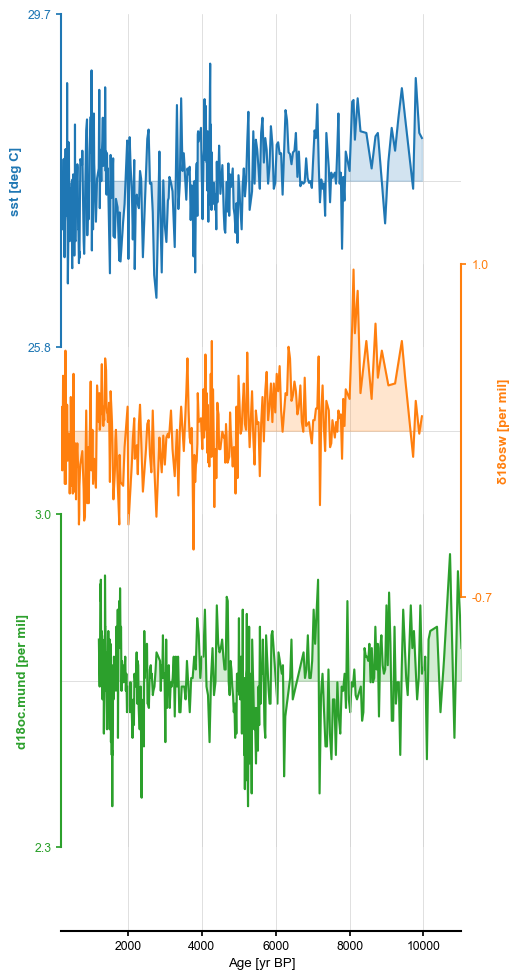

(<Figure size 400x1000 with 4 Axes>,
 {0: <Axes:ylabel='sst [deg C]'>,
  1: <Axes:ylabel='δ18osw [per mil]'>,
  2: <Axes:ylabel='d18oc.mund [per mil]'>,
  3: <Axes:xlabel='Age [yr BP]'>})

In [5]:
#Create a multiple series objects
ms = pyleo.MultipleSeries([sst,d18Osw,mund])
ms.stackplot(figsize=[4,10],labels=None)

All records display low-frequency variability. Note the benthic age has been offset by 1000 years to take into consideration travel time. The record therefore represent water mass temperature and salinity (captured through \\(\delta^{18}Osw\\) at the time of formation.

**Question**: Is the observed low-frequency variability in these records statistically significant?

We will address this questions through spectral and wavelet analysis.

## <a name='statistics'>Statistical Methods</a> 

### <a name='spectral'>Spectral Analysis</a>

The original study made use of the Lomb-Scargle method for spectral analysis because the data is extremely evenly-spaced due to deformation from the CALYPSO coring system as shown by the distribution of age increments. 

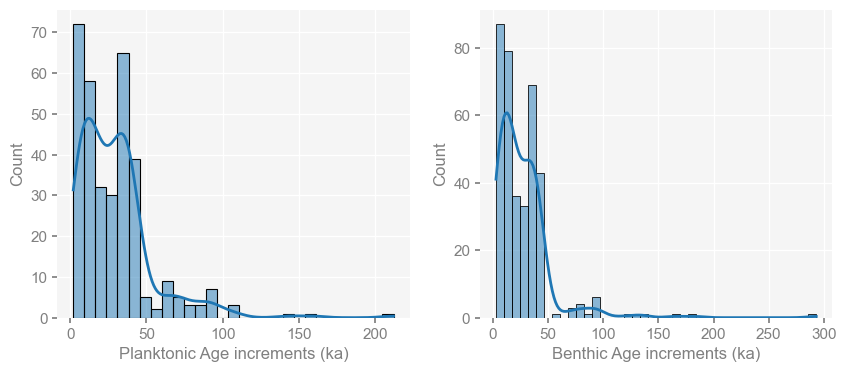

In [7]:
dt=np.diff(sst.time)
dt2=np.diff(mund.time) ## this is equivalent to using (ts.__dict__['time'])
fig, ax = plt.subplots(1,2, figsize=[10,4])
sns.histplot(dt,kde=True,ax=ax[0])
ax[0].set_xlabel('Planktonic Age increments (ka)')
sns.histplot(dt2,kde=True,ax=ax[1])
ax[1].set_xlabel('Benthic Age increments (ka)')
pyleo.showfig(fig)

Binning the data in age increments of 200 years (the largest age increment observed) would significantly decrease the resolution of the record. However interpolation to ~30yr increments would introduce serial dependency in the early Holocene, which may bias the statistical results. Therefore, we will employ methods appropriate for evenly-spaced data in our analysis such as the Lomb-Scargle periodogram.

Because we are interested in millennial-scale variability, let's first remove any long-term trend in the data. To do so, let's use the [detrending](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.detrend) funtionality in Pyleoclim. We will use the default method, which is based on empirical mode decomposition (EMD).

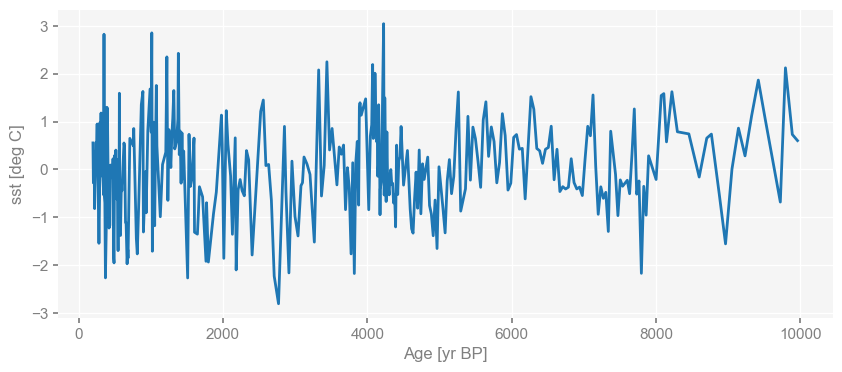

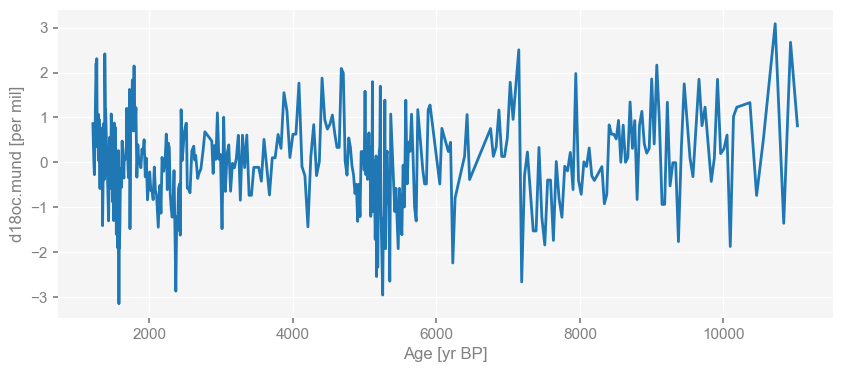

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Age [yr BP]', ylabel='d18oc.mund [per mil]'>)

In [28]:
sst.detrend().standardize().plot(legend=False)
mund.detrend().standardize().plot(legend=False)

Notice the `.` in-between each method above, which allows to chain methods. In short, we have asked Pyleoclim to first detrend, then standardize, and finally plot the resulting time series. 

#### <a name=spectralsurf> Sea Surface Temperature </a>

We can also use method chaining to link pre-processing (in this case, detrending and standardization) and analysis (spectral analysis through [Lomb-Scargle](https://pyleoclim-util.readthedocs.io/en/master/utils/spectral/lombscargle.html#utils-lombscargle) and associated significance) steps. Here, significance level is assessed through an AR1 Monte-Carlo process and we will retain to 90th, 95th and 99th quantile of the resulting distribution. This may take a while; therefore, we will store the answers as they become available. Pyleoclim has a way to store some of its object in [JSON format](https://pyleoclim-util.readthedocs.io/en/master/utils/introduction.html#jsonutils). 

**NOTE**: Although this particular implementation of the Lomb-Scargle periodogram is fast, you may skip this step and load the results on the next steps.

In [25]:
psd_sst = sst.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle').signif_test(number=10000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sst,'./data/psd_sst.json')

Performing spectral analysis on individual series: 100%|█| 10000/10000 [03:14<00


Let's plot our results!

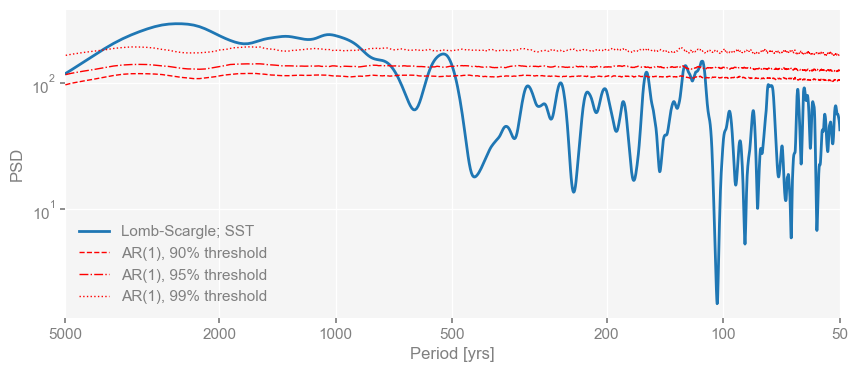

In [5]:
psd_sst = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sst.json') #Load data
fig, ax = psd_sst.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle; SST']+current_labels[-3:]) #replace the first entry in the legend
pyleo.showfig(fig)

The record displays significant power (>99% percentile on the AR1 benchmark) in the millenial band. However, we made several decisions in pre-processing and analysis. To ensure that these results are "paleoclimatically" significant, we need to address the following:

* Did pre-processing affect our results? 
    * Here we chose to detrend using an the EMD method. 
        * Would no detrending or any other choice of detrending method affect the results?
        * Are other steps (e.g., outliers removal necessary for analysis?
    * We chose Lomb-Scargle for analysis, a choice motivated by the uneven sampling of the this particular series.
        * Did the choice of parameters affect the results? We will concentrate on two of the parameters, which may potentially affect the results: `window` (Pyleoclim offers a range of possible windowing techniques) and `n50`, which corresponds to the number of 50% overlapping segment in the weighted overlapped segment averaging method (WOSA, also called the [Welch's method](https://www.osti.gov/servlets/purl/5688766)).
        * Do we obtain the same result through the weighted wavelet Z-Transform ([WWZ](https://pyleoclim-util.readthedocs.io/en/master/utils/spectral/wwz_psd.html#utils-wwzpsd),[Foster](https://adsabs.harvard.edu/full/1996AJ....112.1709F), [Zhu](https://www.pnas.org/content/116/18/8728.short)) method? 

##### <a name=prespectral> Effect of choice of pre-processing steps on the analysis results</a>

Here we will consider the choice of detrending methods and whether the removal of outliers is necessary prior analysis.

Pyleoclim has several [detrending](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.detrend) methods available:
* Linear
* Constant, which removes the mean of the time series and may not be appropriate here
* savitzky-golay, which removes the trend captured by a savitzky-golay filter
* EMD (default)

Since we are interested at looking at the difference in the spectra, we will not run significance for speed. 

In [6]:
psd_sst_nodt = sst.standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle')
psd_sst_sg = sst.detrend(method='savitzky-golay').standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle')
psd_sst_linear = sst.detrend(method='linear').standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle')
psd_sst_emd = sst.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle')

Let's plot the three spectra for comparison:

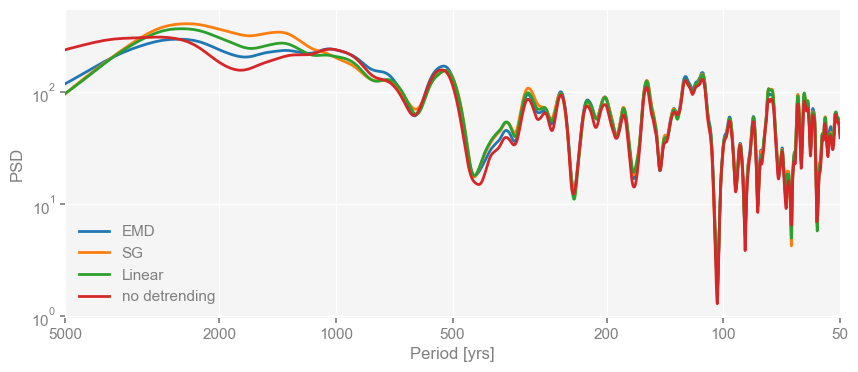

In [7]:
fig,ax = psd_sst_emd.plot(xlim=[5000,50],mute=True)
psd_sst_sg.plot(mute=True,xlim=[5000,50],ax=ax)
psd_sst_linear.plot(mute=True,xlim=[5000,50],ax=ax)
psd_sst_nodt.plot(mute=True,xlim=[5000,50],ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['EMD','SG','Linear','no detrending']) ##replace legend entries
pyleo.showfig(fig)

The choice of detrending does not affect the results.

Let's now consider whether to remove outliers. Pyleoclim offers a [method](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#pyleoclim.core.ui.Series.outliers) to do so based on clustering.

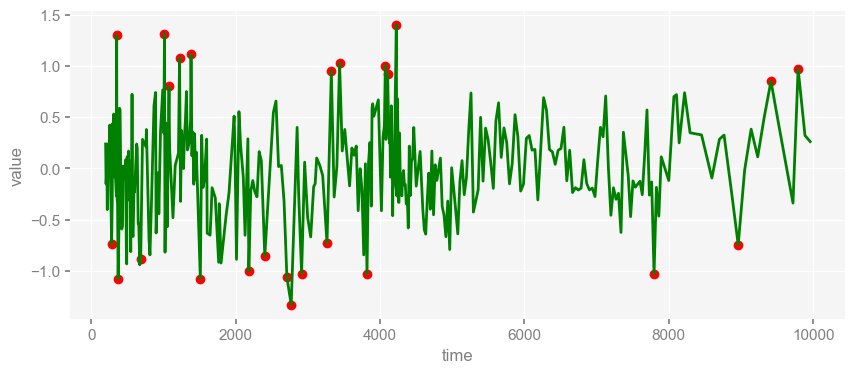

In [8]:
sst_out = sst.detrend().outliers(fig_knee=False)

The detected outliers are labeled in red above. Let's compare the spectra from the record with outliers removed with the original.

In [9]:
psd_sst_out = sst_out.standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle')

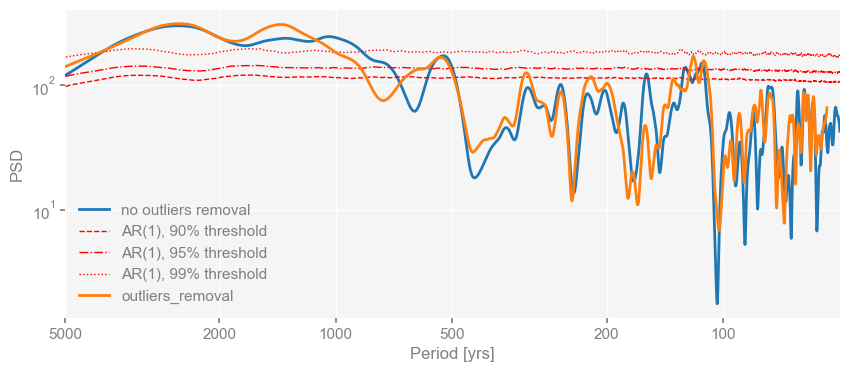

In [10]:
fig,ax = psd_sst.plot(xlim=[5000,50],mute=True)
psd_sst_out.plot(mute=True,xlim=[5000,50],ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['no outliers removal']+current_labels[1:4]+['outliers_removal']) #replace legend entries
pyleo.showfig(fig)

Removing outliers does not affect our conclusions in regards of millennial-scale variability, which is the focus here. However, please note the drop in significance for the peak ~180yr, which suggest that its significance was tied to a few points in the record and should therefore be interpreted with care.

##### <a name=paramspectral> Effect of choice of parameters on the analysis results</a>

The [Lomb-Scargle method](https://pyleoclim-util.readthedocs.io/en/master/utils/spectral/lombscargle.html#utils-lombscargle) takes several arguments. Of note, the following may affect the shape of the spectrum:
* `window` which allows a user the select different windows (the goal of a window is to reduce spectral leakage).
* `n50` which controls the number of 50% overlapping segements.

Let's start with the effect of windows. 

In [17]:
windows = ['boxcar','triang','blackman','hamming','hann','bartlett','blackmanharris']
psd_windows = []
for item in windows:
    psd_windows.append(sst.detrend().spectral(method='lomb_scargle', freq_method='lomb_scargle',settings={'window':item}))

Let's plot the results:

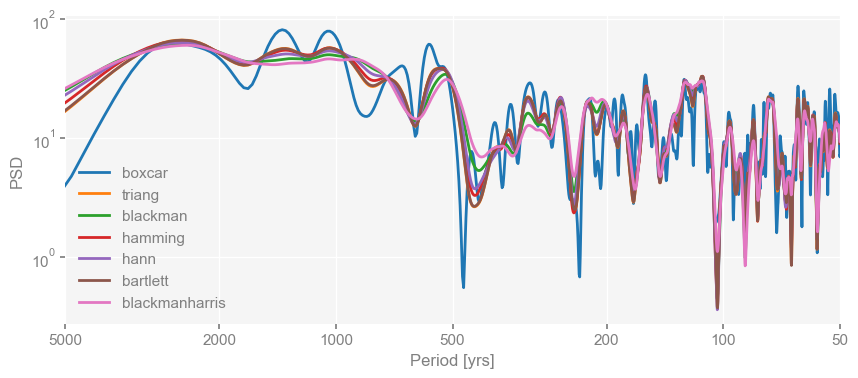

In [18]:
fig,ax = psd_windows[0].plot(xlim=[5000,50],mute=True)
for idx, item in enumerate(psd_windows):
    if idx==0:
        pass
    else:
        item.plot(xlim=[5000,50],mute=True,ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,windows) #replace legend entries
pyleo.showfig(fig)

Changing the windows affect the shape of the peaks in the millennial band. With a `boxcar` window, peaks are more defined around ~1000yr, ~1500yr, and ~2500yr periodicity.

Let's now look at the effect of `n50`:

In [19]:
n50 = np.arange(1,5,1)
psd_n50 = []
for item in n50:
    psd_n50.append(sst.detrend().spectral(method='lomb_scargle', freq_method='lomb_scargle',settings={'n50':item}))

Let's plot:

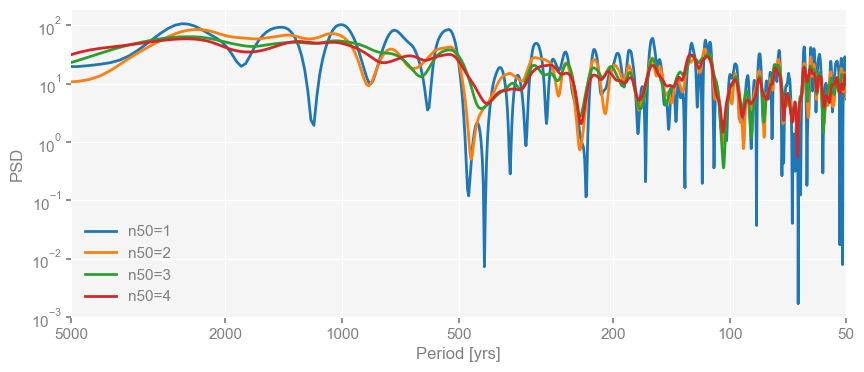

In [20]:
fig,ax = psd_n50[0].plot(xlim=[5000,50],mute=True)
for idx, item in enumerate(psd_n50):
    if idx==0:
        pass
    else:
        item.plot(xlim=[5000,50],mute=True,ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
n50_labels=[]
for item in n50:
    n50_labels.append('n50='+str(item))
plt.legend(current_handles,n50_labels) #replace legend entries
pyleo.showfig(fig)

The number or ovelapping segments also affect the "peakeness" of the sprectrum. When no WOSA is applied, the record displays more defined peaks, which is not suprising for the millennial band. When dividing the record into 3 overlapping segments, only 1/2 of the record is used at anyone time. Furthermore, the half is divided on a per point basis rather than time. Given that the unevenlyness of the MD98-2181 records is due to stretching at the top of the core, the first half of the record is much shorter in time than the second half of the record: 

In [27]:
ts=sst.time
ys=sst.value
n50 = 3
nseg=int(np.floor(2*len(ts)/(n50+1)))
index=np.array(np.arange(0,len(ts),nseg/2),dtype=int)
if len(index) == n50+2:
    index[-1] = len(ts)
else:
    index=np.append(index,len(ts)) #make it ends at the time series

ts_seg=[]
ys_seg=[]

if n50>1:
    for idx,i in enumerate(np.arange(0,len(index)-2,1)):
        ts_seg.append(ts[index[idx]:index[idx+2]])
        ys_seg.append(ys[index[idx]:index[idx+2]])

In [31]:
min=np.min(ts_seg[0])
max=np.max(ts_seg[0])

print('The minimum age is: '+str(min) +' yrBP')
print('The maximum age is: '+str(max)+' yrBP')

The minimum age is: 199.0yrBP
The maximum age is: 3671.0yrBP


In [32]:
min=np.min(ts_seg[2])
max=np.max(ts_seg[2])

print('The minimum age is: '+str(min) +' yrBP')
print('The maximum age is: '+str(max)+' yrBP')

The minimum age is: 3698.0 yrBP
The maximum age is: 9960.0 yrBP


Indeed, the first segment covers ~3500years of record while the last segment ~6300years. In other words, we try to find 1000-yr, 1500-yr, 2500-yr cycles in ~3500 year of record. In this case, it may make sense to interpret on n50=1 (no WOSA applied).

Let's rerun our significance test with n50=1.

In [22]:
psd_sst_n50_1 = sst.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle',settings={'n50':1}).signif_test(number=10000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sst_n50_1,'./data/psd_sst_n50_1.json')

Performing spectral analysis on individual series: 100%|█| 10000/10000 [02:14<00


And plot the results

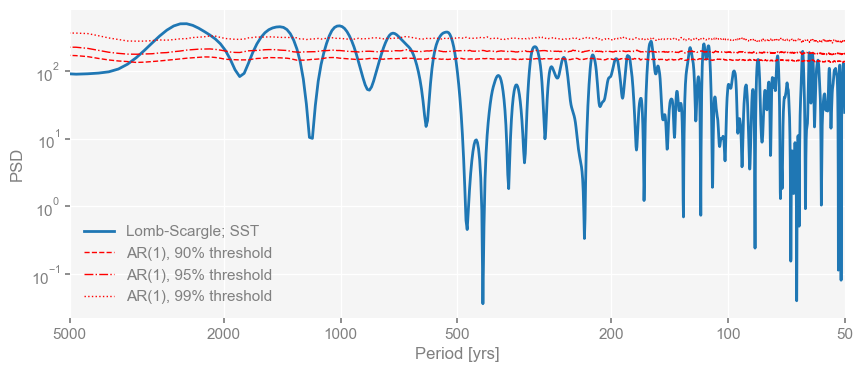

In [23]:
psd_sst_n50_1 = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sst_n50_1.json') #Load data
fig, ax = psd_sst_n50_1.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle; SST']+current_labels[-3:]) #replace the first entry in the legend
pyleo.showfig(fig)

The peaks identified are significant at the 99% threshold.

The last effect to consider is the choice of analysis method. Here we worked with the Lomb-Scargle periodogram. Pyleoclim offers another technique for unevenly-spaced time series: the weigthed wavelet Z-transform (WWZ). 

##### <a name=anaspectral> Effect of choice of algorithm on the analysis results</a>

Let's rerun with the [WWZ method](https://pyleoclim-util.readthedocs.io/en/master/utils/spectral/wwz_psd.html#utils-wwzpsd):

**Note**: This method is computer intensive. It will take over an hour to run the next cell. We suggest that you load the results directly from the following cell. 

In [ ]:
psd_sst_wwz=sst.detrend().standardize().spectral(method='wwz',freq_method='lomb_scargle').signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sst_wwz,'./data/psd_sst_wwz.json')

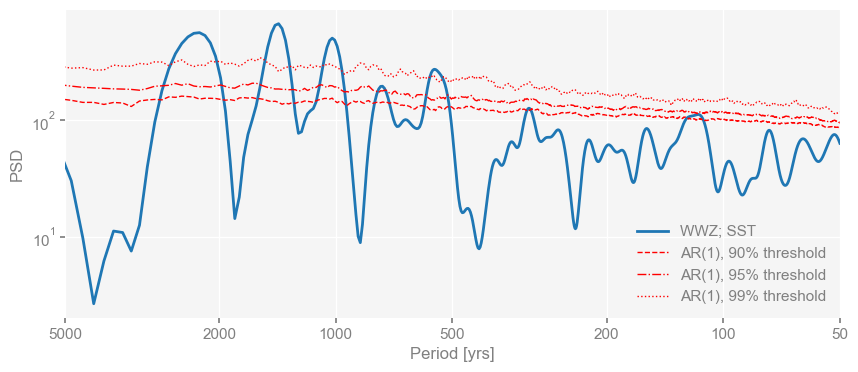

In [21]:
psd_sst_wwz = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sst_wwz.json')
fig3, ax = psd_sst_wwz.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(current_handles,['WWZ; SST']+current_labels[-3:])
pyleo.showfig(fig3)

The record displays significant power (>99% percentile on the AR1 benchmark) in the millenial band, with defined peaks similar to that obtained with Lomb-Scargle, with n50=1.

Let's compare the two spectra on the same figure:

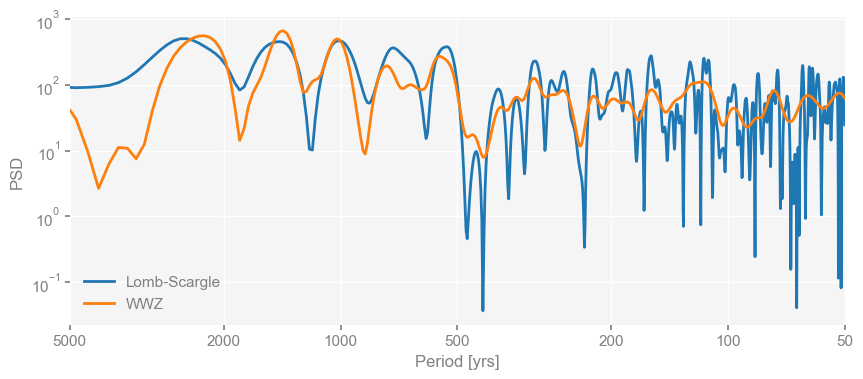

In [33]:
fig,ax = sst.detrend().standardize().spectral(method='lomb_scargle',freq_method='lomb_scargle',settings={'n50':1}).plot(xlim=[5000,50],mute=True)
sst.detrend().standardize().spectral(method='wwz',freq_method='lomb_scargle').plot(xlim=[5000,50],mute=True,ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle','WWZ']) #replace legend entries
pyleo.showfig(fig)

Indeed, the two spectra are very similar, especially in the millennial band. 

**Conclusion**: The millennial-scale variability observed in the SST record is statistically significant and robust to changes in pre-processing steps, analysis algorithm, and associated parameters. However, peaks should be interpreted more carefully. There seems to be some power in the 1000-yr, 1500-yr, and 2500-yr band; but these are not robust to changes in parameters.

#### <a name=spectralbenthic> Benthic record </a>

Let's repeat out analysis on the benthic record. We will use Lomb-Scagle (n50=1) and WWZ and test the sensitivity to pre-processing steps.

Again, you may wish to skip this step and load the results directly in the next cell.

In [34]:
psd_mund = mund.detrend().standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':1}).signif_test(number=10000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_mund,'./data/psd_mund.json')

Performing spectral analysis on individual series: 100%|█| 10000/10000 [02:38<00


Let's load the data from memory and plot the PSD.

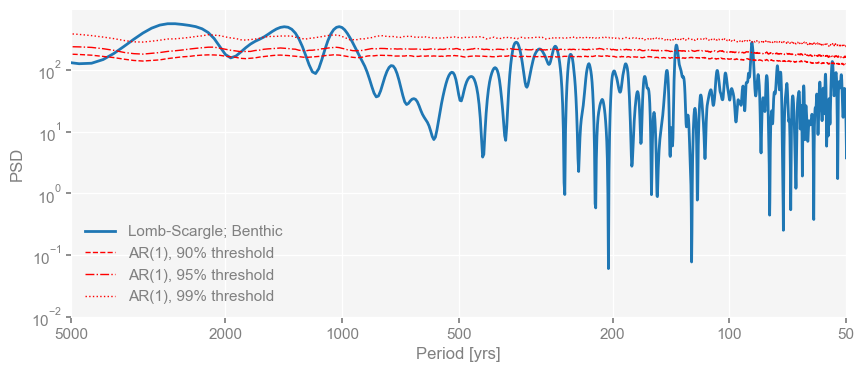

In [35]:
psd_mund = pyleo.utils.jsonutils.json_to_PSD('./data/psd_mund.json')
fig2, ax = psd_mund.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(current_handles,['Lomb-Scargle; Benthic']+current_labels[-3:])
pyleo.showfig(fig2)

The benthic record displays similar millennial power than the SST record.

Let's explore the effect of pre-processing on the record.

##### <a name=premund> Effect of choice of pre-processing steps on the analysis results</a>

Let's start with detrending.

In [37]:
detrend_method = ['no detrending','linear','savitzky-golay','emd']
mund_detrend = []
for item in detrend_method:
    if item == 'no detrending':
        mund_detrend.append(mund.standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':1}))
    else:
        mund_detrend.append(mund.detrend(method=item).standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle', settings={'n50':1}))

Let's plot the results:

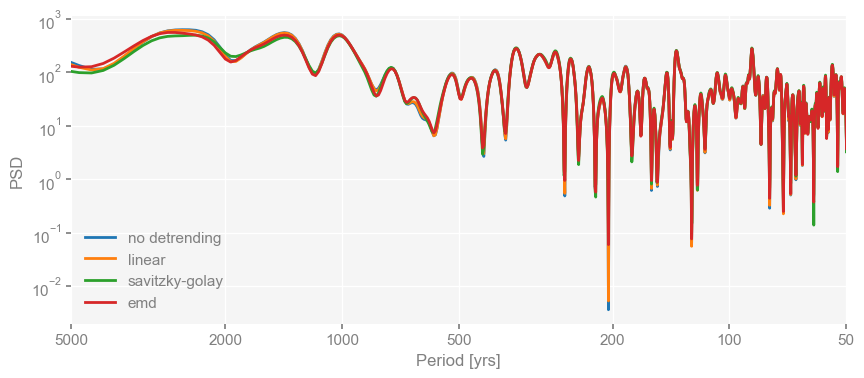

In [38]:
fig,ax = mund_detrend[0].plot(xlim=[5000,50],mute=True)
for idx, item in enumerate(mund_detrend):
    if idx==0:
        pass
    else:
        item.plot(xlim=[5000,50],mute=True,ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,detrend_method) #replace legend entries
pyleo.showfig(fig)

As with the SST record, the detrending method doens't affect the results.

Let's look at the outliers in the record.

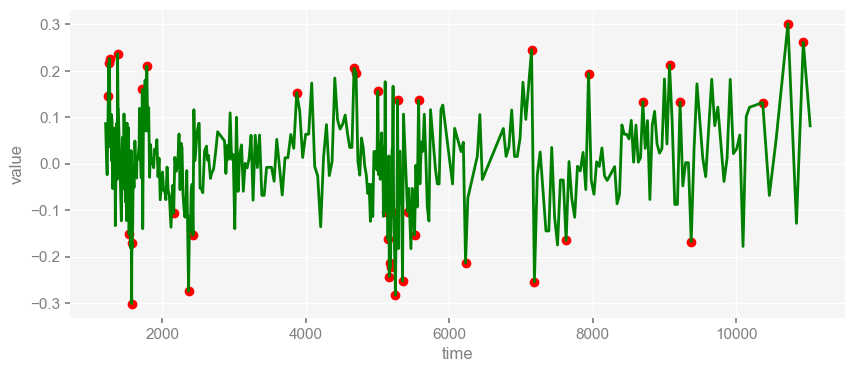

In [39]:
mund_out = mund.detrend().outliers(fig_knee=False)

Let's calculate the spectra and compare:

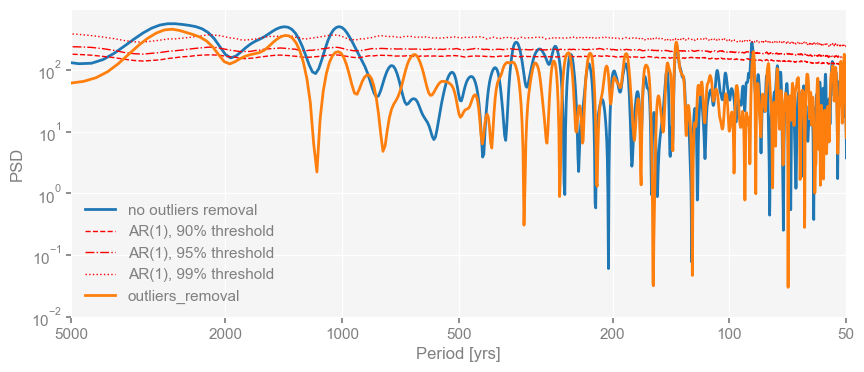

In [40]:
psd_mund_out = mund_out.standardize().spectral(method='lomb_scargle', freq_method='lomb_scargle',settings={'n50':1})
fig,ax = psd_mund.plot(xlim=[5000,50],mute=True)
psd_mund_out.plot(mute=True,xlim=[5000,50],ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['no outliers removal']+current_labels[1:4]+['outliers_removal']) #replace legend entries
pyleo.showfig(fig)

In this case, outliers removal affects the significance of the peaks in the millennial band. 

##### <a name=anamund> Effect of choice of algorithm on the analysis results</a>

Let's use WWZ to see if our results are consistent across the two methods.

**Note**: This method is extremely computer intensive (1:30hrs for computation of the significance level). You may want to skip the cell below and go to the next.

In [6]:
psd_mund_wwz=mund.detrend().standardize().spectral(method='wwz',freq_method='lomb_scargle').signif_test(number=1000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_mund_wwz,'./data/psd_mund_wwz.json')

Performing spectral analysis on individual series: 100%|█| 1000/1000 [1:35:57<00


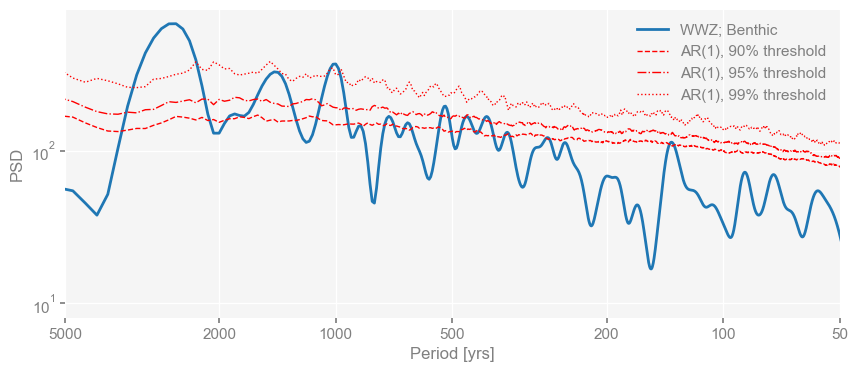

In [41]:
psd_mund_wwz = pyleo.utils.jsonutils.json_to_PSD('./data/psd_mund_wwz.json')
fig4, ax = psd_mund_wwz.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels()
plt.legend(current_handles,['WWZ; Benthic']+current_labels[-3:])
pyleo.showfig(fig4)

Similarly, the benthic record exhibit significant millennial-scale variability centered about 1000yr, 1500yr, and 2500yr periods. Note that the roughness in the AR1 quantile estimate stems from the relatively low number of simulations (1000 for efficiency). 

Let's compare the spectra obtained through the two methods on the same plot:

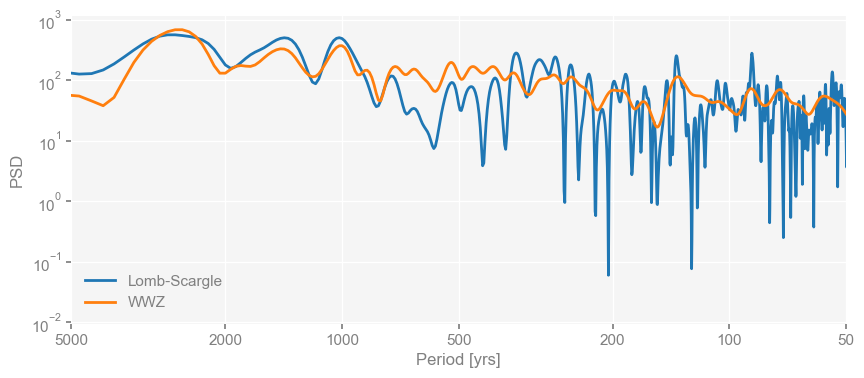

In [42]:
fig,ax = mund.detrend().standardize().spectral(method='lomb_scargle',freq_method='lomb_scargle',settings={'n50':1}).plot(xlim=[5000,50],mute=True)
mund.detrend().standardize().spectral(method='wwz',freq_method='lomb_scargle').plot(xlim=[5000,50],mute=True,ax=ax)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle','WWZ']) #replace legend entries
pyleo.showfig(fig)

The two methods return qualitatively similar answers, especially in the millennial band. 

**Conclusions** Both the SST and benthic record exhibit significant power in the millennial band. In some analytical setting, the power seems concentrated in the 1000-yr, 1500-yr, and 2500-yr band. 

### <a name='wavelet'>Wavelet Analysis</a>

**Note**: The wavelet method employed here is WWZ (which we have used to determine the PSD), which is computationally expensive.

In [8]:
scal_sst = sst.detrend().standardize().wavelet(freq_method='lomb_scargle').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(scal_sst,'./data/scal_sst.json')

Performing wavelet analysis on individual series: 100%|█| 1000/1000 [2:00:09<00:


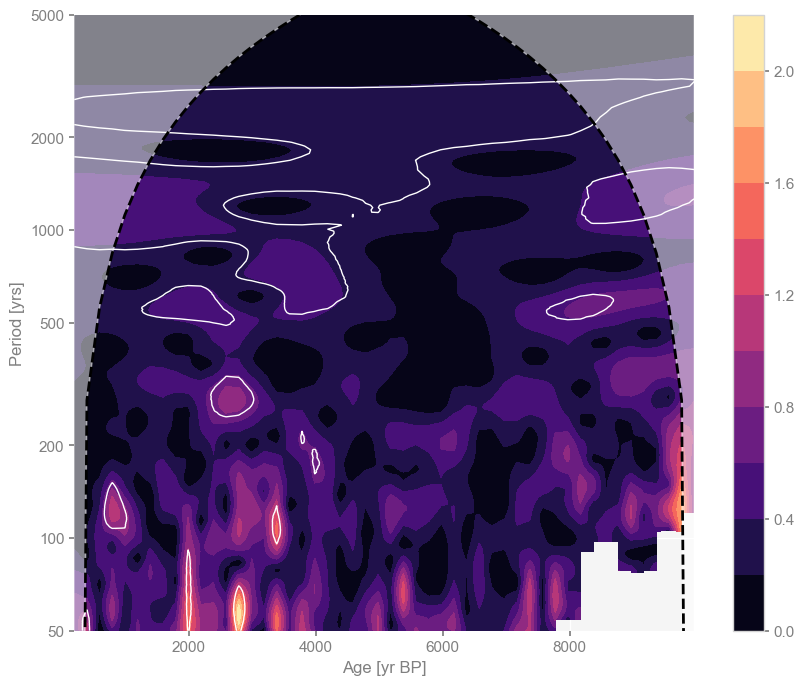

In [10]:
scal_sst = pyleo.utils.jsonutils.json_to_Scalogram('./data/scal_sst.json')
fig_scal,ax = scal_sst.plot(mute=True)
ax.set_ylim([50,5000])
pyleo.showfig(fig_scal)

Wavelet analysis allows inferring the evolution of the spectral power throughout the Holocene. Although power in the ~2500-year band is consistent thoughout the record, power in the 1000-1500yr band is concentrated in the earlier and later part of the record, with a drop in power between 2000 and 8000 yr BP.

In [7]:
scal_mund = mund.detrend().standardize().wavelet(freq_method='lomb_scargle').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(scal_mund,'./data/scal_mund.json')

Performing wavelet analysis on individual series: 100%|█| 1000/1000 [1:42:53<00:


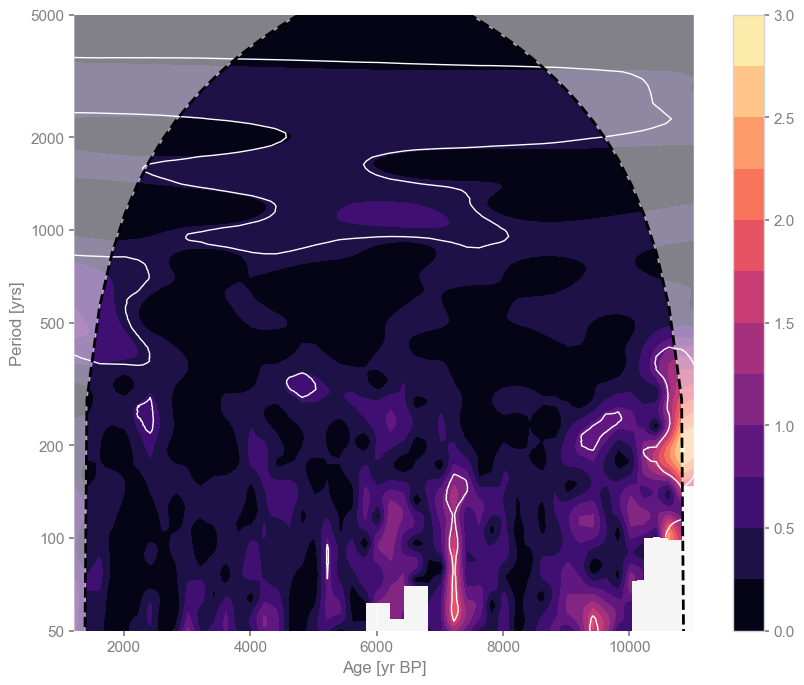

In [9]:
scal_mund = pyleo.utils.jsonutils.json_to_Scalogram('./data/scal_mund.json')
fig_scal1,ax = scal_mund.plot(mute=True)
ax.set_ylim([50,5000])
pyleo.showfig(fig_scal1)

Much like the planktonic record, the benthic record exhibits significant power in the 2500-year band throughout the Holocene. Unlike the planktonic record, the record exhibits significant power in the 1000-1500-yr band between 3000 and 8000 yr BP.  

### <a name='xwt'>Cross-Wavelet Analysis</a>

Let's run cross-wavelet analysis on the record to see if there are any coherence between the two records.

**Note**: Use the pre-loaded results.

In [6]:
xwt_MD81=sst.detrend().standardize().wavelet_coherence(mund.detrend().standardize(),freq_method='lomb_scargle').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(xwt_MD81,'./data/xwt_MD81.json')

Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [3:05:36<00:0


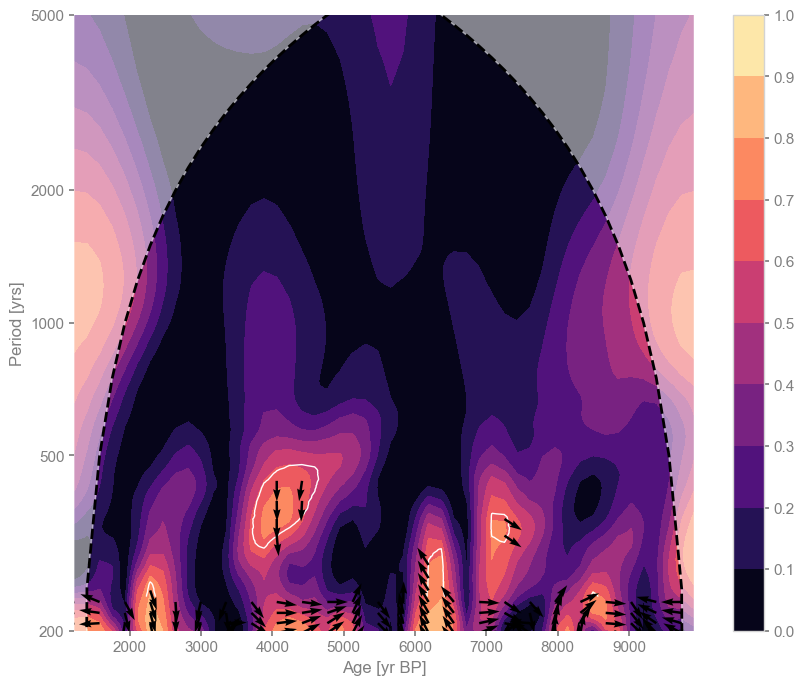

In [27]:
xwt_MD81 = pyleo.utils.jsonutils.json_to_Coherence('./data/xwt_MD81.json')
fig_xwt,ax = xwt_MD81.plot(mute=True)
ax.set_ylim([200,5000])
pyleo.showfig(fig_xwt)

There is singificnat 90deg coherence at aroung 4500BP between the planktonic and benthic record.

## <a name='solar'>Solar variability</a>

The 1000-yr and 2500-yr periodicities correspond to the Eddy and Hallstatt solar cycles. Let's run spectral analysis on the Steinhilber et al. record.

In [11]:
solar = pd.read_excel('./data/steinhilber2012.xls',sheet_name = 'Data',skiprows=21)
solar

,Year,1.PC,1.PCErr,Phi,PhiErr,TSI,TSIErr
0,-27,1.00,0.03,617,63,0.31,0.53
1,-5,1.00,0.03,611,56,0.30,0.52
2,17,1.06,0.06,512,107,0.19,0.49
3,39,1.22,0.08,291,93,-0.12,0.41
4,61,1.36,0.12,154,119,-0.38,0.39
...,...,...,...,...,...,...,...
424,9301,1.23,0.08,277,151,-0.14,0.40
425,9323,1.15,0.05,384,132,-0.01,0.43
426,9345,1.24,0.07,266,146,-0.18,0.39
427,9367,1.34,0.07,155,136,-0.38,0.39


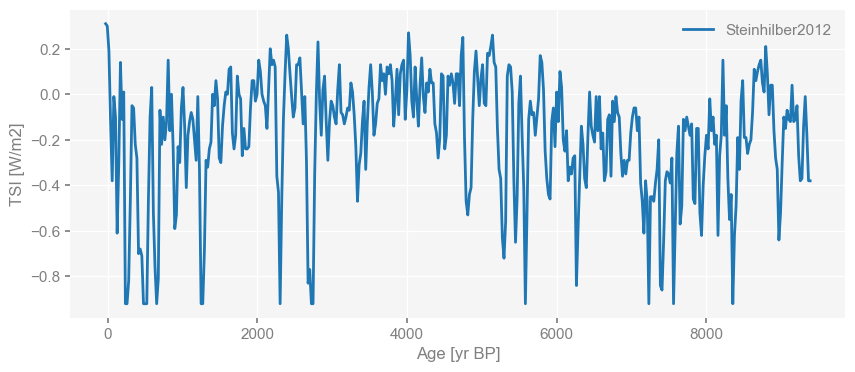

(<Figure size 1000x400 with 1 Axes>,
 <AxesSubplot:xlabel='Age [yr BP]', ylabel='TSI [W/m2]'>)

In [12]:
sun = pyleo.Series(time=solar['Year'],value=solar['TSI'],time_unit='yr BP', time_name='Age', value_name='TSI', value_unit='W/m2', label='Steinhilber2012')
sun.plot()

Run spectral analysis

In [30]:
psd_sun = sun.standardize().spectral(freq_method='lomb_scargle').signif_test(number=10000,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sun,'./data/psd_sun.json')

Performing spectral analysis on individual series: 100%|█| 10000/10000 [04:16<00


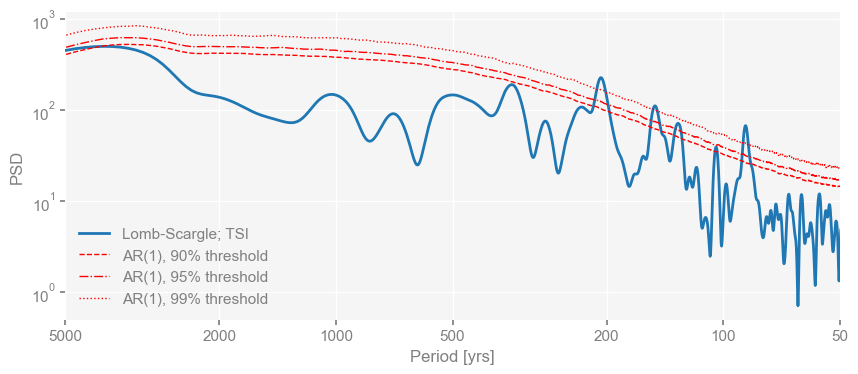

In [31]:
psd_sun = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sun.json') #Load data
fig5, ax = psd_sun.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle; TSI']+current_labels[-3:]) #replace the first entry in the legend
pyleo.showfig(fig5)

In [35]:
psd_sun_wwz = sun.standardize().spectral(method='wwz',freq_method='lomb_scargle').signif_test(number=500,qs=[0.90,0.95,0.99])
pyleo.utils.jsonutils.PyleoObj_to_json(psd_sun_wwz,'./data/psd_sun_wwz.json')

Performing spectral analysis on individual series: 100%|█| 500/500 [1:22:24<00:0


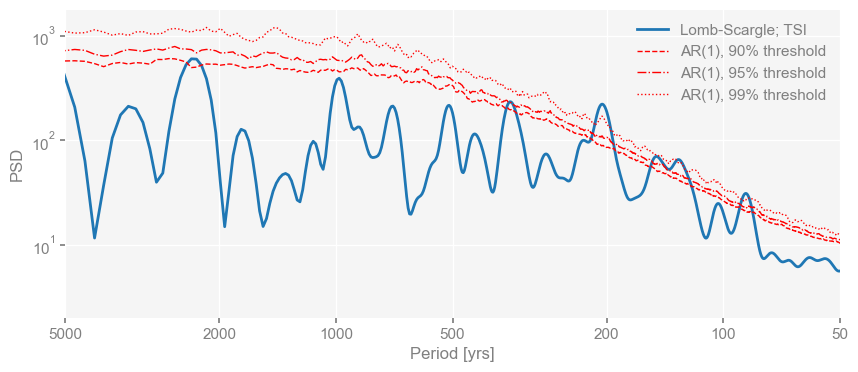

In [36]:
psd_sun_wwz = pyleo.utils.jsonutils.json_to_PSD('./data/psd_sun_wwz.json') #Load data
fig6, ax = psd_sun_wwz.plot(xlim=[5000,50],mute=True)
current_handles, current_labels = plt.gca().get_legend_handles_labels() #get the information about the legend
plt.legend(current_handles,['Lomb-Scargle; TSI']+current_labels[-3:]) #replace the first entry in the legend
pyleo.showfig(fig6)

In [14]:
scal_sun = sun.standardize().wavelet(freq_method='lomb_scargle').signif_test(number=1000)
pyleo.utils.jsonutils.PyleoObj_to_json(scal_sun,'./data/scal_sun.json')

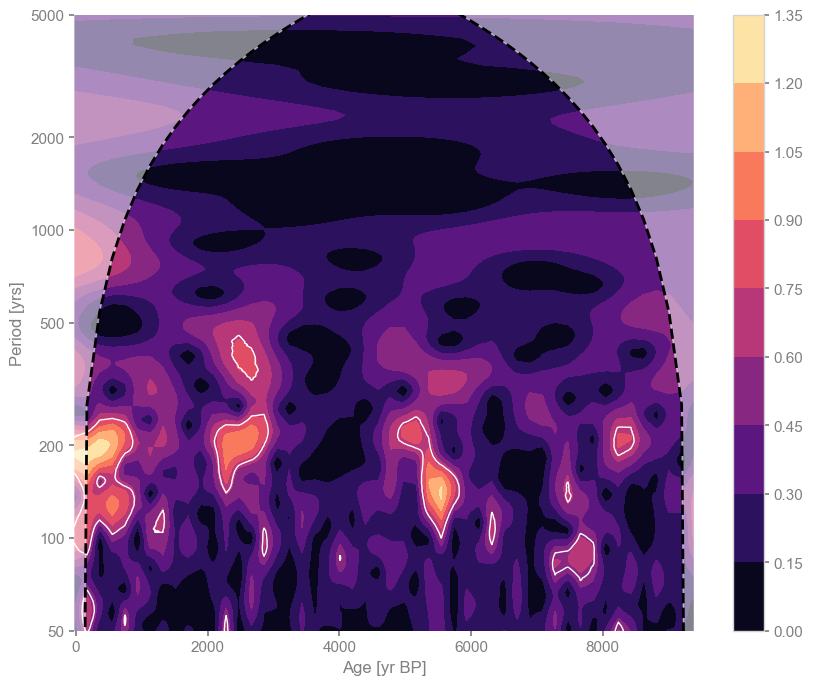

In [15]:
scal_sun = pyleo.utils.jsonutils.json_to_Scalogram('./data/scal_sun.json')
fig_scal2,ax = scal_sun.plot(mute=True)
ax.set_ylim([50,5000])
pyleo.showfig(fig_scal2)

Filer in the millennium band

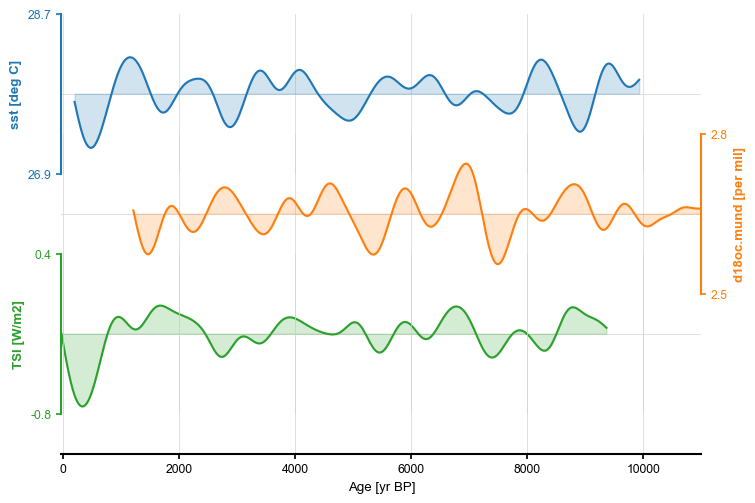

(<Figure size 640x480 with 4 Axes>,
 {0: <Axes:ylabel='sst [deg C]'>,
  1: <Axes:ylabel='d18oc.mund [per mil]'>,
  2: <Axes:ylabel='TSI [W/m2]'>,
  3: <Axes:xlabel='Age [yr BP]'>})

In [37]:
f1 = 1/3000
f2 = 1/700

sst_filt=sst.interp().filter(cutoff_freq=[f1,f2])
mund_filt=mund.interp().filter(cutoff_freq=[f1,f2])
sun_filt=sun.interp().filter(cutoff_freq=[f1,f2])

ms_filt = pyleo.MultipleSeries([sst_filt,mund_filt,sun_filt])
ms_filt.stackplot(labels=None)